<a href="https://colab.research.google.com/github/benject/deep_learning/blob/main/linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Linear Regression

In [ ]:
import numpy as np

In [ ]:
def mse(m,predict,real):

  result =  np.sum((predict - real)**2) / (2 * m)
  return result


In [ ]:
class MyLinearRegression():

  def __init__(self,w,b):

    self.w = w
    self.b = b
    self.lr = 1
    self.lr_w = 0
    self.lr_b = 0
    pass

  def forward(self,X): 
    """
    n, 参数个数
    m, 数据个数
    
    w : n 行 1 列
    X ： n 行 m 列
   
    """

    return np.dot(self.w.T, X) + self.b

  def backward(self,m,predict,real,X):

    grad_w = 1/m* np.dot(X,(predict-real).T) # 损失函数对w的求偏导
    grad_b = 1/m* np.sum(predict - real) #损失函数对b的求偏导
    return grad_w,grad_b
  
  def optimization(self,dw,db):

    self.lr_w = self.lr_w + np.power(dw,2) ##ada grad；自适应的学习率 可以极大提高学习效率
    new_w = self.w - self.lr / np.sqrt(self.lr_w) * dw ##ada grad； 自适应的学习率 可以极大提高学习效率
    #new_w = self.w - self.learning_rate * dw

    self.lr_b = self.lr_b + db**2 ##ada grad；自适应的学习率 可以极大提高学习效率 
    new_b = self.b - self.lr / np.sqrt(self.lr_b) * db ##ada grad；自适应的学习率 可以极大提高学习效率
    #new_b = self.b - self.learning_rate * db
    return new_w,new_b

  def update(self,new_w,new_b):

    self.w = new_w
    self.b = new_b



(1, 50)
(1, 50)


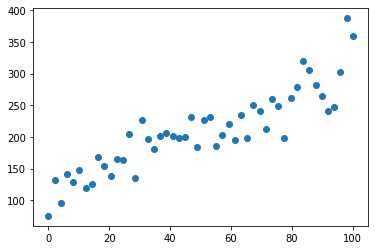

In [ ]:

X0 = np.linspace(0,100,50)

X1 = X0.reshape(1,50) 
Y = X1 * 2 + 103.556 + np.random.randn(1,50)*30

import matplotlib.pyplot as plt

plt.scatter(X1,Y)


print(X1.shape)
print(Y.shape)


[[1.92220312]]
113.48623829492843


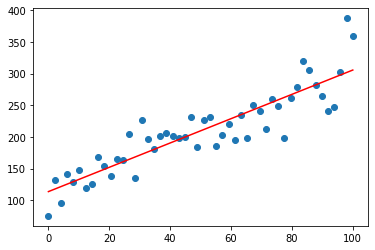

In [ ]:
w = np.ones((1,1)) #只有1个特征值
b = 0.

linR = MyLinearRegression(w,b)

for i in range(30000):

  A = linR.forward(X1)
  grad_w,grad_b = linR.backward(50,A,Y,X1)
  new_w,new_b = linR.optimization(grad_w,grad_b)
  linR.update(new_w,new_b)

print(linR.w)
print(linR.b)

x = np.linspace(0, 100, 50)

y1 = linR.w[0,0] * x + linR.b

plt.figure()

plt.scatter(X1,Y)

plt.plot(x, y1,color ='red')


plt.show()

接下来使用pytorch实现

In [ ]:
import torch

class torchLR(torch.nn.Module): #继承Module类

  def __init__(self):

    super().__init__()

    self.linear = torch.nn.Linear(1,1)  #一个线性层 代表为 y=xW.T + b 。 在这里 w是参数矩阵 维度为（1，n） ；x是数据 维度为（m，n） b是偏置项
    self.crit = torch.nn.MSELoss() #损失函数
    self.optim = torch.optim.Adam(self.parameters(),lr=1.) #优化器 

  
  def forward(self,x):
    result = self.linear(x) #线性回归 直接用 y = xW.T + b 来做激活函数。
    return result


torLR = torchLR()

X3 = X1.T

x1 = torch.from_numpy(X3) #如果是从numpy 的ndarray 数据。一定要用torch.from_numpy做转换 
y = torch.from_numpy(Y.T) #如果是从numpy 的ndarray 数据。一定要用torch.from_numpy做转换 

#训练30000次
for i in range(30000):

  A = torLR.forward(x1.float()) 
  loss = torLR.crit(A.float(),y.float())
  torLR.optim.zero_grad()
  loss.backward()
  torLR.optim.step()

#打印参数值
for name, param in torLR.named_parameters():
    if param.requires_grad:
        print( name, param.data)
  

linear.weight tensor([[1.9215]])
linear.bias tensor([113.5261])
